# Setup
Here are all the Packages I use. If you don't have them already set up in your environment, you may have to do a `Pkg.add`

In [10]:
using DataFrames, CSV

In [11]:
using Statistics

In [12]:
using StatsBase

In [13]:
# for histogram()
using StatsPlots

In [14]:
using Plots.PlotMeasures

In [15]:
gr()

Plots.GRBackend()

In [16]:
using Dates

In [17]:
ENV["LINES"] = 72

72

In [18]:
ENV["COLUMNS"] = 90

90

## Helper functions

In [19]:
# calculate new cases by subtracting prior count; shifts back time array by one day
function newcases(a)
    nc = Array{Int64,1}()
    for i in 1:length(a) - 1
        push!(nc, a[i+1] - a[i])
    end
    return nc
end

newcases (generic function with 1 method)

In [20]:
# smooth a time series using an odd sized window; will decrease the time array half the window length off the front and back
function smooth(a, ws)
    if iseven(ws) error("even window for smoothing"); end
    sa = Array{Float64,1}()
    for i in 1:length(a) - ws + 1
        push!(sa, mean(a[i:i+ws-1]))
    end
    return sa
end

smooth (generic function with 1 method)

In [21]:
# to make plotting log scale easier
logprotect(a) = [max(1, x) for x in a]

logprotect (generic function with 1 method)

# Johns Hopkins Data
This is the Covid-19 data made available by Johns Hopkins. You can download from https://github.com/CSSEGISandData/COVID-19

I am only parsing the daily time series summary tables, including confirmed, deaths and recovered. All those data come from the daily case report.

Field description
* Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* Country/Region: country/region name conforming to WHO (will be updated).
* Lat and Long: a coordinates reference for the user.
* Date fields: M/DD/YYYY (UTC), the same data as MM-DD-YYYY.csv file.



In [22]:
# get the latest using GitHub
import GitHub
import Base64

In [23]:
filelist = map(x->x.name, GitHub.directory("CSSEGISandData/COVID-19", "csse_covid_19_data/csse_covid_19_time_series/")[1])[3:end]

6-element Array{String,1}:
 "README.md"
 "time_series_covid19_confirmed_US.csv"
 "time_series_covid19_confirmed_global.csv"
 "time_series_covid19_deaths_US.csv"
 "time_series_covid19_deaths_global.csv"
 "time_series_covid19_recovered_global.csv"

In [24]:
# update files from GitHub
@time for fn in filelist
    open(fn, "w") do f
        write(f, String(Base64.base64decode(
                    GitHub.file("CSSEGISandData/COVID-19", "csse_covid_19_data/csse_covid_19_time_series/" * fn).content)))
    end
end

 16.988870 seconds (714.12 k allocations: 43.623 MiB, 0.17% gc time)


## US confirmed cases

In [25]:
@time usconf = CSV.read("time_series_covid19_confirmed_US.csv")

  4.341509 seconds (7.84 M allocations: 374.730 MiB, 3.48% gc time)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region
,Int64,String,String,Int64,Int64⍰,String⍰,String,String
1,16,AS,ASM,16,60,missing,American Samoa,US
2,316,GU,GUM,316,66,missing,Guam,US
3,580,MP,MNP,580,69,missing,Northern Mariana Islands,US
4,630,PR,PRI,630,72,missing,Puerto Rico,US
5,850,VI,VIR,850,78,missing,Virgin Islands,US
6,84001001,US,USA,840,1001,Autauga,Alabama,US
7,84001003,US,USA,840,1003,Baldwin,Alabama,US
8,84001005,US,USA,840,1005,Barbour,Alabama,US
9,84001007,US,USA,840,1007,Bibb,Alabama,US


In [26]:
describe(usconf)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,UID,8.39031e7,16,8.403e7,84099999
2,iso2,,AS,,VI
3,iso3,,ASM,,VIR
4,code3,839.445,16,840.0,850
5,FIPS,32090.9,60,30045.0,99999
6,Admin2,,Abbeville,,Ziebach
7,Province_State,,Alabama,,Wyoming
8,Country_Region,,US,,US
9,Lat,37.1609,-14.271,38.1472,69.3148


In [27]:
confdaterange = 12:length(names(usconf)[12:end]) + 12 -1

12:97

In [28]:
# create an Array of Date for xaxis plotting
@time datelist = Date.(string.(names(usconf)[confdaterange]), "m/dd/yy") .+ Year(2000)

  0.515467 seconds (1.22 M allocations: 61.392 MiB)


86-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 2020-02-04
 2020-02-05
 2020-02-06
 2020-02-07
 2020-02-08
 2020-02-09
 2020-02-10
 2020-02-11
 2020-02-12
 2020-02-13
 2020-02-14
 2020-02-15
 2020-02-16
 2020-02-17
 2020-02-18
 2020-02-19
 2020-02-20
 2020-02-21
 2020-02-22
 2020-02-23
 2020-02-24
 ⋮
 2020-03-15
 2020-03-16
 2020-03-17
 2020-03-18
 2020-03-19
 2020-03-20
 2020-03-21
 2020-03-22
 2020-03-23
 2020-03-24
 2020-03-25
 2020-03-26
 2020-03-27
 2020-03-28
 2020-03-29
 2020-03-30
 2020-03-31
 2020-04-01
 2020-04-02
 2020-04-03
 2020-04-04
 2020-04-05
 2020-04-06
 2020-04-07
 2020-04-08
 2020-04-09
 2020-04-10
 2020-04-11
 2020-04-12
 2020-04-13
 2020-04-14
 2020-04-15
 2020-04-16

In [29]:
# Array of State names as String
states = unique(usconf.Province_State)

58-element Array{String,1}:
 "American Samoa"
 "Guam"
 "Northern Mariana Islands"
 "Puerto Rico"
 "Virgin Islands"
 "Alabama"
 "Alaska"
 "Arizona"
 "Arkansas"
 "California"
 "Colorado"
 "Connecticut"
 "Delaware"
 "District of Columbia"
 "Florida"
 "Georgia"
 "Hawaii"
 "Idaho"
 "Illinois"
 "Indiana"
 "Iowa"
 "Kansas"
 "Kentucky"
 "Louisiana"
 "Maine"
 "Maryland"
 "Massachusetts"
 "Michigan"
 "Minnesota"
 "Mississippi"
 "Missouri"
 "Montana"
 "Nebraska"
 "Nevada"
 "New Hampshire"
 "New Jersey"
 "New Mexico"
 "New York"
 "North Carolina"
 "North Dakota"
 "Ohio"
 "Oklahoma"
 "Oregon"
 "Pennsylvania"
 "Rhode Island"
 "South Carolina"
 "South Dakota"
 "Tennessee"
 "Texas"
 "Utah"
 "Vermont"
 "Virginia"
 "Washington"
 "West Virginia"
 "Wisconsin"
 "Wyoming"
 "Diamond Princess"
 "Grand Princess"

## US death

In [30]:
@time usdeath = CSV.read("time_series_covid19_deaths_US.csv")

  0.006853 seconds (2.95 k allocations: 5.910 MiB)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region
,Int64,String,String,Int64,Int64⍰,String⍰,String,String
1,16,AS,ASM,16,60,missing,American Samoa,US
2,316,GU,GUM,316,66,missing,Guam,US
3,580,MP,MNP,580,69,missing,Northern Mariana Islands,US
4,630,PR,PRI,630,72,missing,Puerto Rico,US
5,850,VI,VIR,850,78,missing,Virgin Islands,US
6,84001001,US,USA,840,1001,Autauga,Alabama,US
7,84001003,US,USA,840,1003,Baldwin,Alabama,US
8,84001005,US,USA,840,1005,Barbour,Alabama,US
9,84001007,US,USA,840,1007,Bibb,Alabama,US


In [31]:
describe(usdeath)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,UID,8.39031e7,16,8.403e7,84099999
2,iso2,,AS,,VI
3,iso3,,ASM,,VIR
4,code3,839.445,16,840.0,850
5,FIPS,32090.9,60,30045.0,99999
6,Admin2,,Abbeville,,Ziebach
7,Province_State,,Alabama,,Wyoming
8,Country_Region,,US,,US
9,Lat,37.1609,-14.271,38.1472,69.3148


In [32]:
deathdaterange = 13:length(names(usdeath)[13:end]) + 13 -1

13:98

## organize data by state

In [33]:
# create a dataframe to organize statistics with State for each row
@time statereports = DataFrame(state = states)
stateconfirm = Dict{String, Vector{Int}}()
statedeath = Dict{String, Vector{Int}}()
statereports.confirm1 = fill(Date(1), length(states))
statereports.confirm2 = fill(Date(1), length(states))
statereports.confirm5 = fill(Date(1), length(states))
statereports.confirmlast = zeros(Int64, length(states))
statereports.death1 = fill(Date(1), length(states))
statereports.death2 = fill(Date(1), length(states))
statereports.death5 = fill(Date(1), length(states))
statereports.deathlast = zeros(Int64, length(states))
statereports.pop = zeros(Int64, length(states))
statereports.maxnewconfirm = fill(Date(1), length(states))
statereports.maxnewdeath = fill(Date(1), length(states))

  0.057500 seconds (81.86 k allocations: 4.165 MiB)


58-element Array{Date,1}:
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01

In [34]:
# populate statereports and sum data for each State for each day
@time for (i, s) in enumerate(states)
    stateconfirm[s] = sum.(eachcol(groupby(usconf, :Province_State)[i][:, confdaterange]))
    statedeath[s] = sum.(eachcol(groupby(usdeath, :Province_State)[i][:, deathdaterange]))
    fd = findfirst(x->x>0, stateconfirm[s])
    if fd != nothing statereports.confirm1[i] = datelist[fd]; end
    fd = findfirst(x->x>1, stateconfirm[s])
    if fd != nothing statereports.confirm2[i] = datelist[fd]; end
    fd = findfirst(x->x>4, stateconfirm[s])
    if fd != nothing statereports.confirm5[i] = datelist[fd]; end
    statereports.confirmlast[i] = stateconfirm[s][end]
    fd = findfirst(x->x>0, statedeath[s])
    if fd != nothing statereports.death1[i] = datelist[fd]; end
    fd = findfirst(x->x>1, statedeath[s])
    if fd != nothing statereports.death2[i] = datelist[fd]; end
    fd = findfirst(x->x>4, statedeath[s])
    if fd != nothing statereports.death5[i] = datelist[fd]; end
    statereports.deathlast[i] = statedeath[s][end]
    statereports.pop[i] = sum(groupby(usdeath, :Province_State)[i].Population)
    a = newcases(stateconfirm[s])
    a1 = findfirst(x->x==maximum(a), a)
    statereports.maxnewconfirm[i] = datelist[2:end][a1 + div(findlast(x->x==maximum(a), a) - a1, 2)]
    a = newcases(statedeath[s])
    a1 = findfirst(x->x==maximum(a), a)
    statereports.maxnewdeath[i] = datelist[2:end][a1 + div(findlast(x->x==maximum(a), a) - a1, 2)]
end

  1.853394 seconds (5.72 M allocations: 298.177 MiB, 5.96% gc time)


  0.003823 seconds (8.70 k allocations: 246.195 KiB)
  0.000588 seconds (1.63 k allocations: 97.023 KiB)


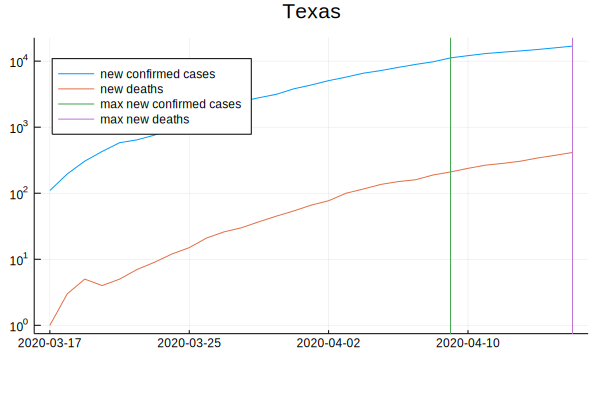

In [224]:
# log raw plot starting with first death
si = findfirst(x->x=="Texas", states)
di = findfirst(x->x==statereports.death1[findfirst(x->x=="Texas", states)], datelist)
@time plot(datelist[di:end], stateconfirm["Texas"][di:end], title="Texas", label="new confirmed cases", legend=:topleft, yaxis=:log)
@time plot!(datelist[di:end], statedeath["Texas"][di:end], title="Texas", label="new deaths")
vline!([statereports.maxnewconfirm[si]], label="max new confirmed cases")
vline!([statereports.maxnewdeath[si]], label="max new deaths")

  0.001904 seconds (8.71 k allocations: 248.336 KiB)
  0.001340 seconds (1.64 k allocations: 99.164 KiB)


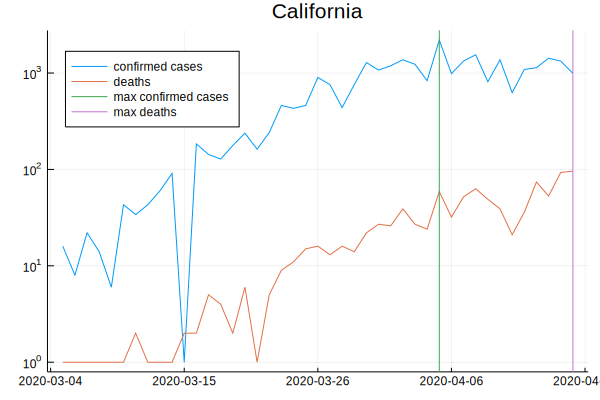

In [107]:
# log new cases plot starting with first death
si = findfirst(x->x=="California", states)
di = findfirst(x->x==statereports.death1[si], datelist)
@time plot(datelist[di+1:end], logprotect(newcases(stateconfirm["California"][di:end])), title="California", label="new confirmed cases", legend=:topleft, yaxis=:log)
@time plot!(datelist[di+1:end], logprotect(newcases(statedeath["California"][di:end])), title="California", label="new deaths")
vline!([statereports.maxnewconfirm[si]], label="max new confirmed cases")
vline!([statereports.maxnewdeath[si]], label="max new deaths")

  0.000971 seconds (8.67 k allocations: 245.852 KiB)
  0.000861 seconds (1.64 k allocations: 98.320 KiB)


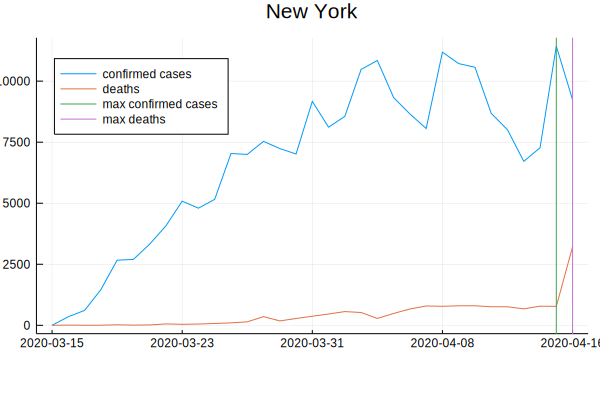

In [193]:
si = findfirst(x->x=="New York", states)
fi = findfirst(x->x==statereports.death1[si], datelist)
@time plot(datelist[fi+1:end], newcases(stateconfirm["New York"][fi:end]), title="New York", label="new confirmed cases", legend=:topleft, )
@time plot!(datelist[fi+1:end], newcases(statedeath["New York"][fi:end]), title="New York", label="new deaths")
vline!([statereports.maxnewconfirm[si]], label="max new confirmed cases")
vline!([statereports.maxnewdeath[si]], label="max new deaths")

In [41]:
statereports[49, :]

,state,confirm1,confirm2,confirm5,confirmlast,death1,death2,death5
,String,Date,Date,Date,Int64,Date,Date,Date
49,Texas,2020-03-05,2020-03-05,2020-03-07,16876,2020-03-17,2020-03-18,2020-03-19


In [42]:
Dates.value(statereports.confirm5[49] - statereports.confirm1[49])

2

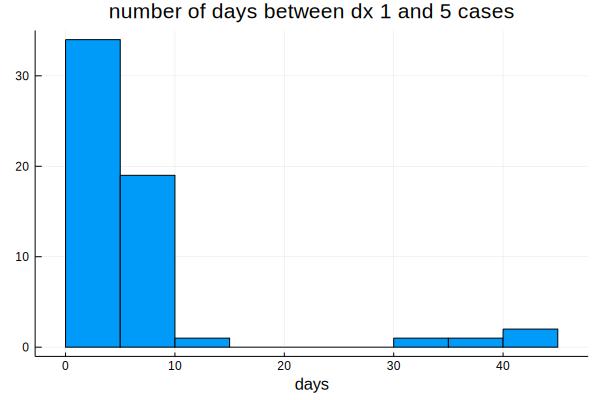

In [43]:
# some States have a big difference between first case and the next
histogram(Dates.value.(statereports.confirm5 - statereports.confirm1), legend=false, bins=15, xlabel="days", title="number of days between dx 1 and 5 cases")

In [44]:
# mean days for 1-5 increase in confirmed cases
mean(Dates.value.(statereports.confirm5 - statereports.confirm1))

5.931034482758621

In [77]:
# standard dev days for 1-5 increase in confirmed cases
std(Dates.value.(statereports.confirm5 - statereports.confirm1))

9.574934508438966

In [46]:
# kind of obvious from the plot, but just to check
skewness(Dates.value.(statereports.confirm5 - statereports.confirm1))

3.0272356722297884

## Global confirmed cases

In [141]:
@time globalconf = CSV.read("time_series_covid19_confirmed_global.csv")

  0.001512 seconds (1.01 k allocations: 539.477 KiB)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20
,String⍰,String,Float64,Float64,Int64,Int64
1,missing,Afghanistan,33.0,65.0,0,0
2,missing,Albania,41.1533,20.1683,0,0
3,missing,Algeria,28.0339,1.6596,0,0
4,missing,Andorra,42.5063,1.5218,0,0
5,missing,Angola,-11.2027,17.8739,0,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0,0
7,missing,Argentina,-38.4161,-63.6167,0,0
8,missing,Armenia,40.0691,45.0382,0,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0,0


In [142]:
describe(globalconf)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Province/State,,Alberta,,Zhejiang,82,182,"Union{Missing, String}"
2,Country/Region,,Afghanistan,,Zimbabwe,185,,String
3,Lat,21.3173,-51.7963,23.4881,71.7069,,,Float64
4,Long,22.1683,-135.0,20.5356,178.065,,,Float64
5,1/22/20,2.10227,0,0.0,444,,,Int64
6,1/23/20,2.47727,0,0.0,444,,,Int64
7,1/24/20,3.56439,0,0.0,549,,,Int64
8,1/25/20,5.43182,0,0.0,761,,,Int64
9,1/26/20,8.02273,0,0.0,1058,,,Int64


In [146]:
filter(x->x[Symbol("Country/Region")]=="US", globalconf)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20
,String⍰,String,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,missing,US,37.0902,-95.7129,1,1,2,2,5


In [147]:
gconfdaterange = 5:length(names(globalconf)[5:end]) + 5 -1

5:90

In [148]:
# create an Array of Date for xaxis plotting
@time gdatelist = Date.(string.(names(globalconf)[gconfdaterange]), "m/dd/yy") .+ Year(2000)

  0.002871 seconds (5.52 k allocations: 270.172 KiB)


86-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 2020-02-04
 2020-02-05
 2020-02-06
 2020-02-07
 2020-02-08
 2020-02-09
 2020-02-10
 2020-02-11
 2020-02-12
 2020-02-13
 2020-02-14
 2020-02-15
 2020-02-16
 2020-02-17
 2020-02-18
 2020-02-19
 2020-02-20
 2020-02-21
 2020-02-22
 2020-02-23
 2020-02-24
 ⋮
 2020-03-15
 2020-03-16
 2020-03-17
 2020-03-18
 2020-03-19
 2020-03-20
 2020-03-21
 2020-03-22
 2020-03-23
 2020-03-24
 2020-03-25
 2020-03-26
 2020-03-27
 2020-03-28
 2020-03-29
 2020-03-30
 2020-03-31
 2020-04-01
 2020-04-02
 2020-04-03
 2020-04-04
 2020-04-05
 2020-04-06
 2020-04-07
 2020-04-08
 2020-04-09
 2020-04-10
 2020-04-11
 2020-04-12
 2020-04-13
 2020-04-14
 2020-04-15
 2020-04-16

In [149]:
# Array of Country names as String
countries = unique(globalconf[:,Symbol("Country/Region")])

185-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 "Bangladesh"
 "Barbados"
 "Belarus"
 "Belgium"
 "Benin"
 "Bhutan"
 "Bolivia"
 "Bosnia and Herzegovina"
 "Brazil"
 "Brunei"
 "Bulgaria"
 "Burkina Faso"
 "Cabo Verde"
 "Cambodia"
 "Cameroon"
 "Canada"
 "Central African Republic"
 "Chad"
 "Chile"
 "China"
 "Colombia"
 ⋮
 "Ukraine"
 "United Arab Emirates"
 "United Kingdom"
 "Uruguay"
 "US"
 "Uzbekistan"
 "Venezuela"
 "Vietnam"
 "Zambia"
 "Zimbabwe"
 "Dominica"
 "Grenada"
 "Mozambique"
 "Syria"
 "Timor-Leste"
 "Belize"
 "Laos"
 "Libya"
 "West Bank and Gaza"
 "Guinea-Bissau"
 "Mali"
 "Saint Kitts and Nevis"
 "Kosovo"
 "Burma"
 "MS Zaandam"
 "Botswana"
 "Burundi"
 "Sierra Leone"
 "Malawi"
 "South Sudan"
 "Western Sahara"
 "Sao Tome and Principe"
 "Yemen"

## Global death

In [150]:
@time globaldeath = CSV.read("time_series_covid19_deaths_global.csv")

  0.001493 seconds (1.00 k allocations: 516.695 KiB)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20
,String⍰,String,Float64,Float64,Int64,Int64
1,missing,Afghanistan,33.0,65.0,0,0
2,missing,Albania,41.1533,20.1683,0,0
3,missing,Algeria,28.0339,1.6596,0,0
4,missing,Andorra,42.5063,1.5218,0,0
5,missing,Angola,-11.2027,17.8739,0,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0,0
7,missing,Argentina,-38.4161,-63.6167,0,0
8,missing,Armenia,40.0691,45.0382,0,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0,0


In [151]:
describe(globaldeath)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Province/State,,Alberta,,Zhejiang,82,182,"Union{Missing, String}"
2,Country/Region,,Afghanistan,,Zimbabwe,185,,String
3,Lat,21.3173,-51.7963,23.4881,71.7069,,,Float64
4,Long,22.1683,-135.0,20.5356,178.065,,,Float64
5,1/22/20,0.0643939,0,0.0,17,,,Int64
6,1/23/20,0.0681818,0,0.0,17,,,Int64
7,1/24/20,0.0984848,0,0.0,24,,,Int64
8,1/25/20,0.159091,0,0.0,40,,,Int64
9,1/26/20,0.212121,0,0.0,52,,,Int64


In [152]:
gdeathdaterange = 5:length(names(globaldeath)[5:end]) + 5 -1

5:90

In [153]:
# create a dataframe to organize statistics with country for each row
@time countryreports = DataFrame(country = countries)
countryconfirm = Dict{String, Vector{Int}}()
countrydeath = Dict{String, Vector{Int}}()
countryreports.confirm1 = fill(Date(1), length(countries))
countryreports.confirm2 = fill(Date(1), length(countries))
countryreports.confirm5 = fill(Date(1), length(countries))
countryreports.confirmlast = zeros(Int64, length(countries))
countryreports.death1 = fill(Date(1), length(countries))
countryreports.death2 = fill(Date(1), length(countries))
countryreports.death5 = fill(Date(1), length(countries))
countryreports.deathlast = zeros(Int64, length(countries))
countryreports.maxnewconfirm = fill(Date(1), length(countries))
countryreports.maxnewdeath = fill(Date(1), length(countries))


  0.000058 seconds (29 allocations: 3.594 KiB)


185-element Array{Date,1}:
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 ⋮
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01

In [154]:
groupby(globalconf, Symbol("Country/Region"))[176]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20
,String⍰,String,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,missing,Burma,21.9162,95.956,0,0,0,0,0


In [155]:
# populate countryreports and sum data for each country for each day
@time for (i, s) in enumerate(countries)
    countryconfirm[s] = sum.(eachcol(groupby(globalconf, Symbol("Country/Region"))[i][:, gconfdaterange]))
    countrydeath[s] = sum.(eachcol(groupby(globaldeath, Symbol("Country/Region"))[i][:, gdeathdaterange]))
    fd = findfirst(x->x>0, countryconfirm[s])
    if fd != nothing countryreports.confirm1[i] = datelist[fd]; end
    fd = findfirst(x->x>1, countryconfirm[s])
    if fd != nothing countryreports.confirm2[i] = datelist[fd]; end
    fd = findfirst(x->x>4, countryconfirm[s])
    if fd != nothing countryreports.confirm5[i] = datelist[fd]; end
    countryreports.confirmlast[i] = countryconfirm[s][end]
    fd = findfirst(x->x>0, countrydeath[s])
    if fd != nothing countryreports.death1[i] = datelist[fd]; end
    fd = findfirst(x->x>1, countrydeath[s])
    if fd != nothing countryreports.death2[i] = datelist[fd]; end
    fd = findfirst(x->x>4, countrydeath[s])
    if fd != nothing countryreports.death5[i] = datelist[fd]; end
    countryreports.deathlast[i] = countrydeath[s][end]
    a = newcases(countryconfirm[s])
    a1 = findfirst(x->x==maximum(a), a)
    countryreports.maxnewconfirm[i] = datelist[2:end][a1 + div(findlast(x->x==maximum(a), a) - a1, 2)]
    a = newcases(countrydeath[s])
    a1 = findfirst(x->x==maximum(a), a)
    countryreports.maxnewdeath[i] = datelist[2:end][a1 + div(findlast(x->x==maximum(a), a) - a1, 2)]
end

  0.193754 seconds (317.29 k allocations: 23.919 MiB, 18.95% gc time)


In [161]:
countries

185-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 "Bangladesh"
 "Barbados"
 "Belarus"
 "Belgium"
 "Benin"
 "Bhutan"
 "Bolivia"
 "Bosnia and Herzegovina"
 "Brazil"
 "Brunei"
 "Bulgaria"
 "Burkina Faso"
 "Cabo Verde"
 "Cambodia"
 "Cameroon"
 "Canada"
 "Central African Republic"
 "Chad"
 "Chile"
 "China"
 "Colombia"
 ⋮
 "Ukraine"
 "United Arab Emirates"
 "United Kingdom"
 "Uruguay"
 "US"
 "Uzbekistan"
 "Venezuela"
 "Vietnam"
 "Zambia"
 "Zimbabwe"
 "Dominica"
 "Grenada"
 "Mozambique"
 "Syria"
 "Timor-Leste"
 "Belize"
 "Laos"
 "Libya"
 "West Bank and Gaza"
 "Guinea-Bissau"
 "Mali"
 "Saint Kitts and Nevis"
 "Kosovo"
 "Burma"
 "MS Zaandam"
 "Botswana"
 "Burundi"
 "Sierra Leone"
 "Malawi"
 "South Sudan"
 "Western Sahara"
 "Sao Tome and Principe"
 "Yemen"

  0.003469 seconds (8.70 k allocations: 246.977 KiB)
  0.000665 seconds (1.63 k allocations: 97.805 KiB)


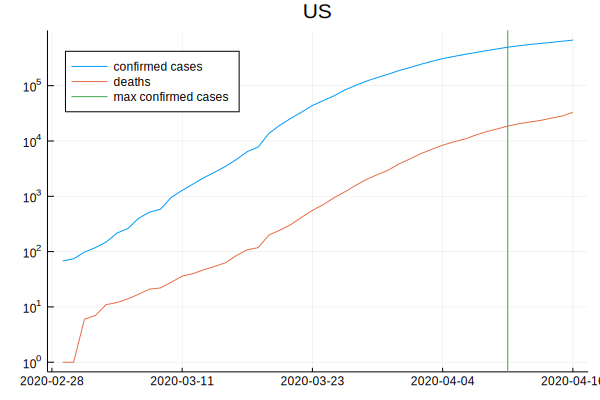

In [166]:
si = findfirst(x->x=="US", countries)
di = findfirst(x->x==countryreports.death1[si], gdatelist)
@time plot(gdatelist[di:end], countryconfirm["US"][di:end], title="US", label="confirmed cases", legend=:topleft, yaxis=:log)
@time plot!(gdatelist[di:end], countrydeath["US"][di:end], title="US", label="deaths")
vline!([countryreports.maxnewconfirm[si]], label="max confirmed cases")

  0.001054 seconds (8.71 k allocations: 248.617 KiB)
  0.000722 seconds (1.64 k allocations: 99.445 KiB)


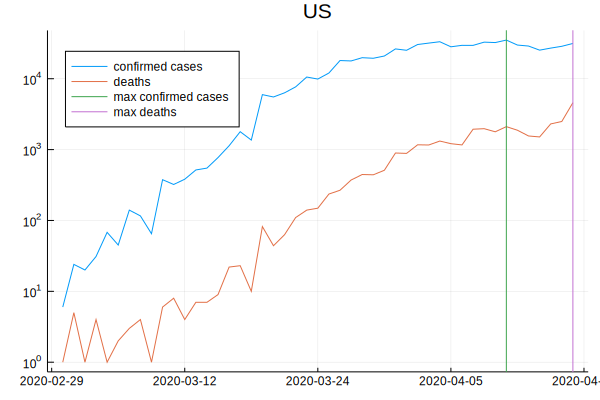

In [167]:
# log new cases plot starting with first death
si = findfirst(x->x=="US", countries)
di = findfirst(x->x==countryreports.death1[si], gdatelist)
@time plot(gdatelist[di+1:end], logprotect(newcases(countryconfirm["US"][di:end])), title="US", label="confirmed cases", legend=:topleft, yaxis=:log)
@time plot!(gdatelist[di+1:end], logprotect(newcases(countrydeath["US"][di:end])), title="US", label="deaths")
vline!([countryreports.maxnewconfirm[si]], label="max confirmed cases")
vline!([countryreports.maxnewdeath[si]], label="max deaths")

## US state reports

In [47]:
names(statereports)

12-element Array{Symbol,1}:
 :state
 :confirm1
 :confirm2
 :confirm5
 :confirmlast
 :death1
 :death2
 :death5
 :deathlast
 :pop
 :maxnewconfirm
 :maxnewdeath

In [48]:
# which States have most recent peak level of new death cases?
sort(statereports[:, [:state, :maxnewdeath]], :maxnewdeath, rev=true)

,state,maxnewdeath
,String,Date
1,California,2020-04-16
2,New York,2020-04-16
3,North Carolina,2020-04-16
4,Texas,2020-04-16
5,Vermont,2020-04-16
6,Connecticut,2020-04-15
7,Maine,2020-04-15
8,Massachusetts,2020-04-15
9,New Jersey,2020-04-15


In [49]:
# which States are still close to peak level of new confirmed cases?
sort(statereports[:, [:state, :maxnewconfirm]], :maxnewconfirm, rev=true)

,state,maxnewconfirm
,String,Date
1,Indiana,2020-04-16
2,North Dakota,2020-04-16
3,Ohio,2020-04-16
4,Tennessee,2020-04-16
5,Mississippi,2020-04-15
6,New Hampshire,2020-04-15
7,New York,2020-04-15
8,South Dakota,2020-04-15
9,Iowa,2020-04-14


In [50]:
# which States have had the most deaths?
sort(statereports[:, [:state, :deathlast]], :deathlast, rev=true)

,state,deathlast
,String,Int64
1,New York,14832
2,New Jersey,3518
3,Michigan,1996
4,Louisiana,1156
5,Massachusetts,1108
6,Illinois,1072
7,Connecticut,971
8,California,956
9,Pennsylvania,841


In [51]:
statereports.deathlast./statereports.pop * 100000

58-element Array{Float64,1}:
   0.0
   3.0445292853271955
   3.626867836936022
   1.9090423152865201
   0.9322444717902822
   2.7125225746122164
   1.2302729155417642
   2.060802748616274
   1.2260570931710608
   2.419504465744689
   6.164547220084407
  27.234834110129142
   5.648185802720166
  11.477168228364475
   3.1101973173430704
   5.5286485242228744
   0.6356506802874836
   2.294264618242761
   8.45971545841754
   7.085331003046693
   1.9017010716085538
   2.746013646314815
   2.8874091725155355
  24.866664343483492
   2.0086117368391294
   5.276494951767212
  16.075437326614146
  19.986267951969275
   1.5426538469176712
   4.334460405040205
   2.5504156045594186
   0.6549536012155939
   1.0856034507715022
   4.447826668519387
   2.353441282743171
  39.60734908845679
   1.7168782003682703
  62.772808522407566
   1.4301944950097654
   1.1810062698310637
   3.4818762778999237
   3.310613092691354
   1.5174013932115729
   6.569291693657915
   8.212497911476824
   2.155878147436428


In [52]:
# slightly different if we factor in population (deaths per 100,000)
ds = statereports.deathlast./statereports.pop * 100000
@time sortslices(hcat(statereports.state, ds), dims=1, lt=(x,y)->isless(x[2],y[2]), rev=true)

  0.929755 seconds (2.84 M allocations: 142.991 MiB, 4.00% gc time)


58×2 Array{Any,2}:
 "Diamond Princess"          NaN
 "Grand Princess"            NaN
 "New York"                   62.7728
 "New Jersey"                 39.6073
 "Connecticut"                27.2348
 "Louisiana"                  24.8667
 "Michigan"                   19.9863
 "Massachusetts"              16.0754
 "District of Columbia"       11.4772
 "Illinois"                    8.45972
 "Rhode Island"                8.2125
 "Washington"                  7.60352
 "Indiana"                     7.08533
 "Pennsylvania"                6.56929
 "Colorado"                    6.16455
 "Delaware"                    5.64819
 "Georgia"                     5.52865
 "Vermont"                     5.28855
 "Maryland"                    5.27649
 "Nevada"                      4.44783
 "Mississippi"                 4.33446
 "Northern Mariana Islands"    3.62687
 "Ohio"                        3.48188
 "Wisconsin"                   3.38346
 "Oklahoma"                    3.31061
 "Florida"                

In [177]:
# for total US current death rate per 100,000
sum(statereports.deathlast)/sum(statereports.pop) * 100000

9.790057458440886

## plot confirmed

  0.150678 seconds (597.36 k allocations: 19.812 MiB, 36.91% gc time)
  0.007164 seconds (28.85 k allocations: 2.271 MiB)


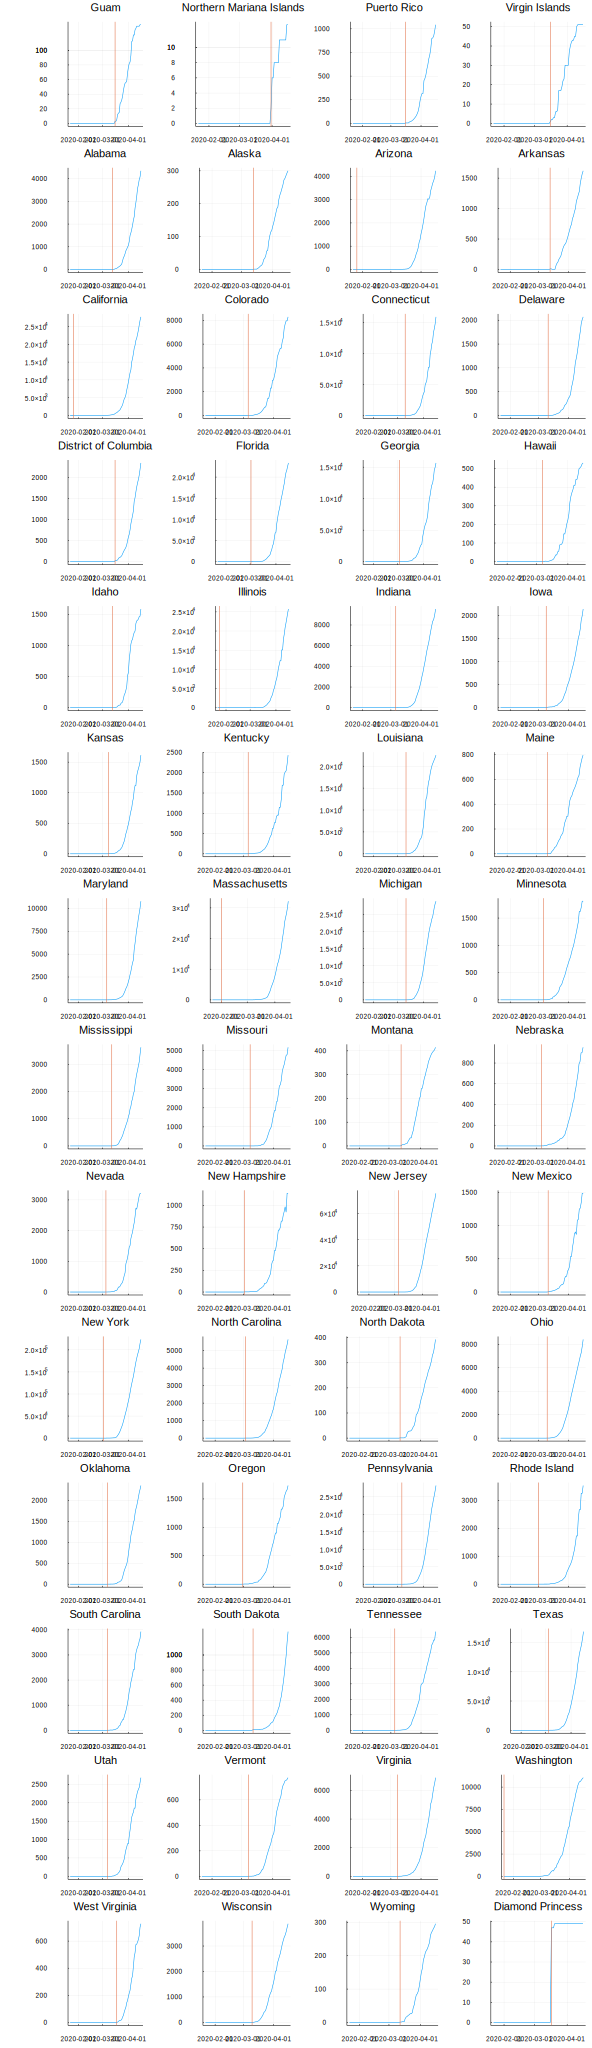

In [78]:
# raw plot with date of first confirmed diagnosis
p = []
@time for i = 2:57
    pi = plot(datelist, stateconfirm[states[i]], title=states[i], legend=false)
    pi = vline!([statereports.confirm1[i]])
    push!(p, pi)
end
@time plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

  0.100650 seconds (599.54 k allocations: 19.941 MiB)
  0.996793 seconds (363.62 k allocations: 18.306 MiB, 32.75% gc time)


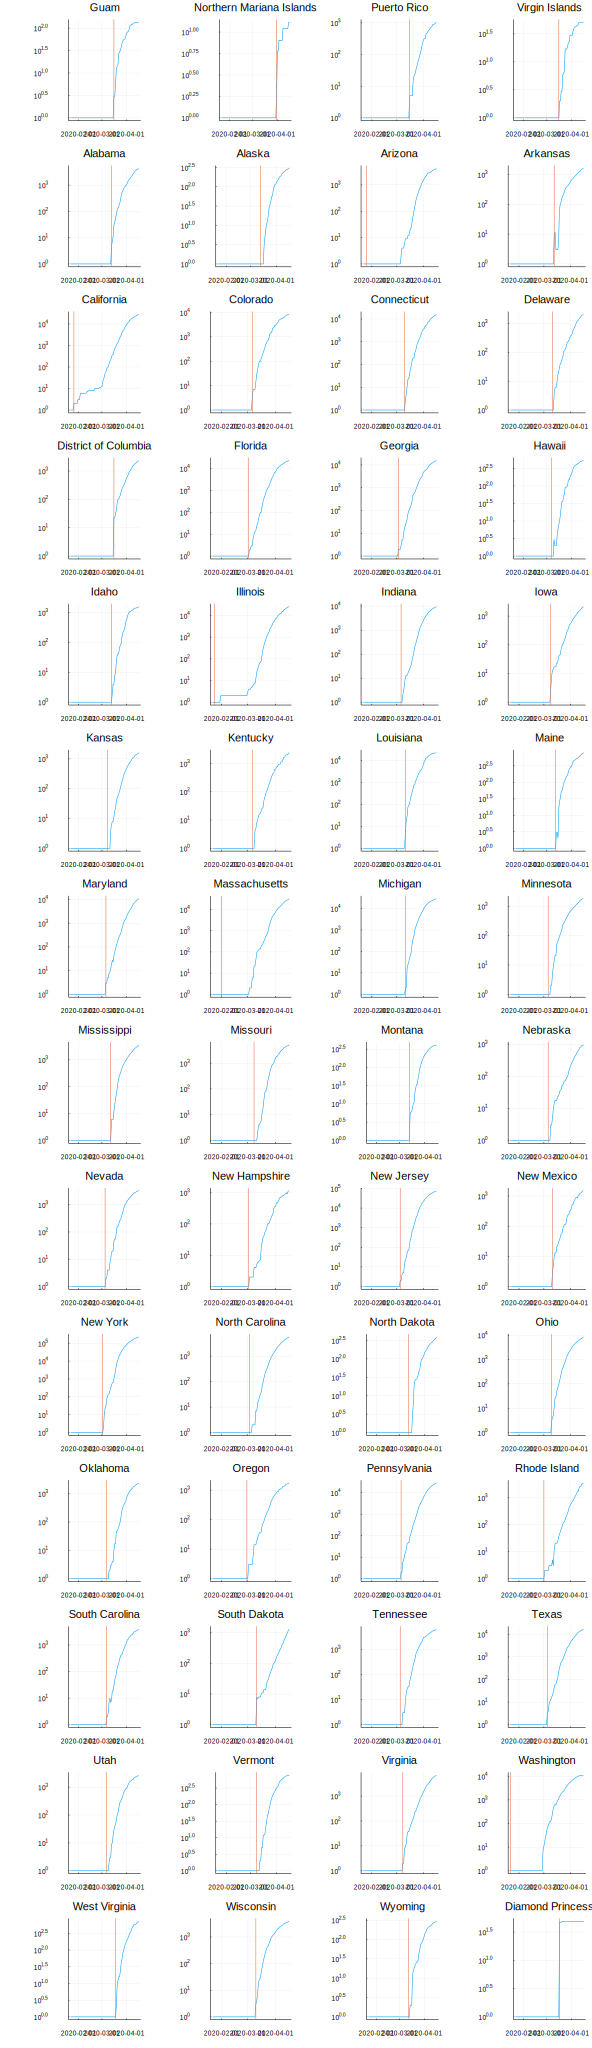

In [189]:
# raw plot is hard to see rate, so let's log scale it to see if we are "flattening the curve"
p = []
@time for i = 2:57
    pi = plot(datelist, logprotect(stateconfirm[states[i]]), title=states[i], legend=false, yaxis=:log)
    pi = vline!([statereports.confirm1[i]])
    push!(p, pi)
end
@time savefig(plot(p..., size=(3000,2400), layout=(7,8), left_margin=50px), "allconfirm.png")
plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

## new confirm

  0.081923 seconds (597.86 k allocations: 19.978 MiB)
  0.713190 seconds (371.31 k allocations: 19.007 MiB)
  0.006319 seconds (28.51 k allocations: 1.766 MiB)


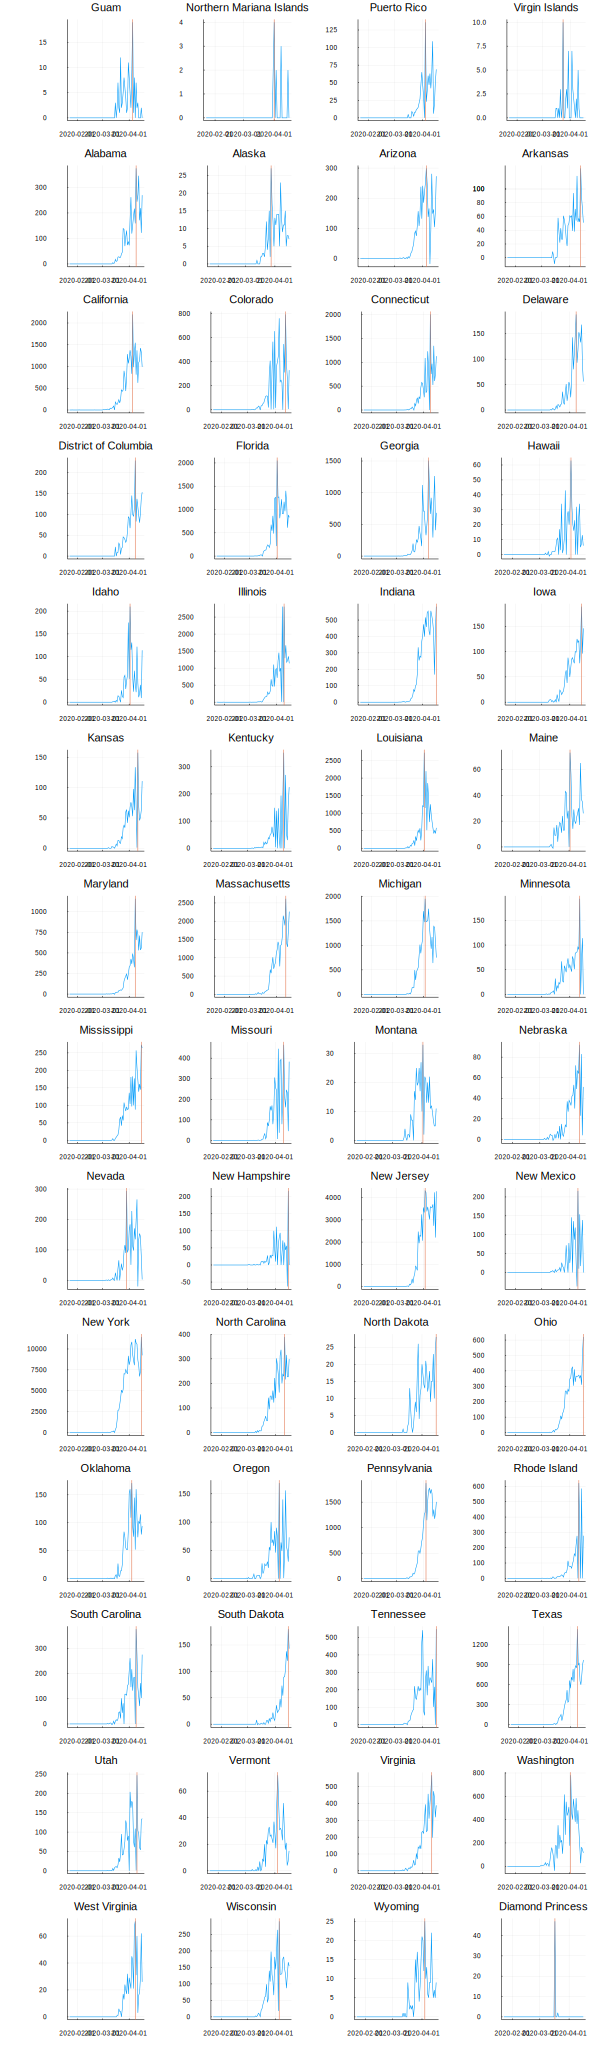

In [190]:
# I think it is a lot easier to see if we plot newcases to see if heading back down to zero
p = []
@time for i = 2:57
    pi = plot(datelist[2:end], newcases(stateconfirm[states[i]]), title=states[i], legend=false)
    pi = vline!([statereports.maxnewconfirm[i]])
    push!(p, pi)
end
@time plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

  0.097529 seconds (602.90 k allocations: 20.595 MiB)
  0.710482 seconds (375.44 k allocations: 19.104 MiB, 4.59% gc time)
  0.006283 seconds (28.51 k allocations: 1.766 MiB)


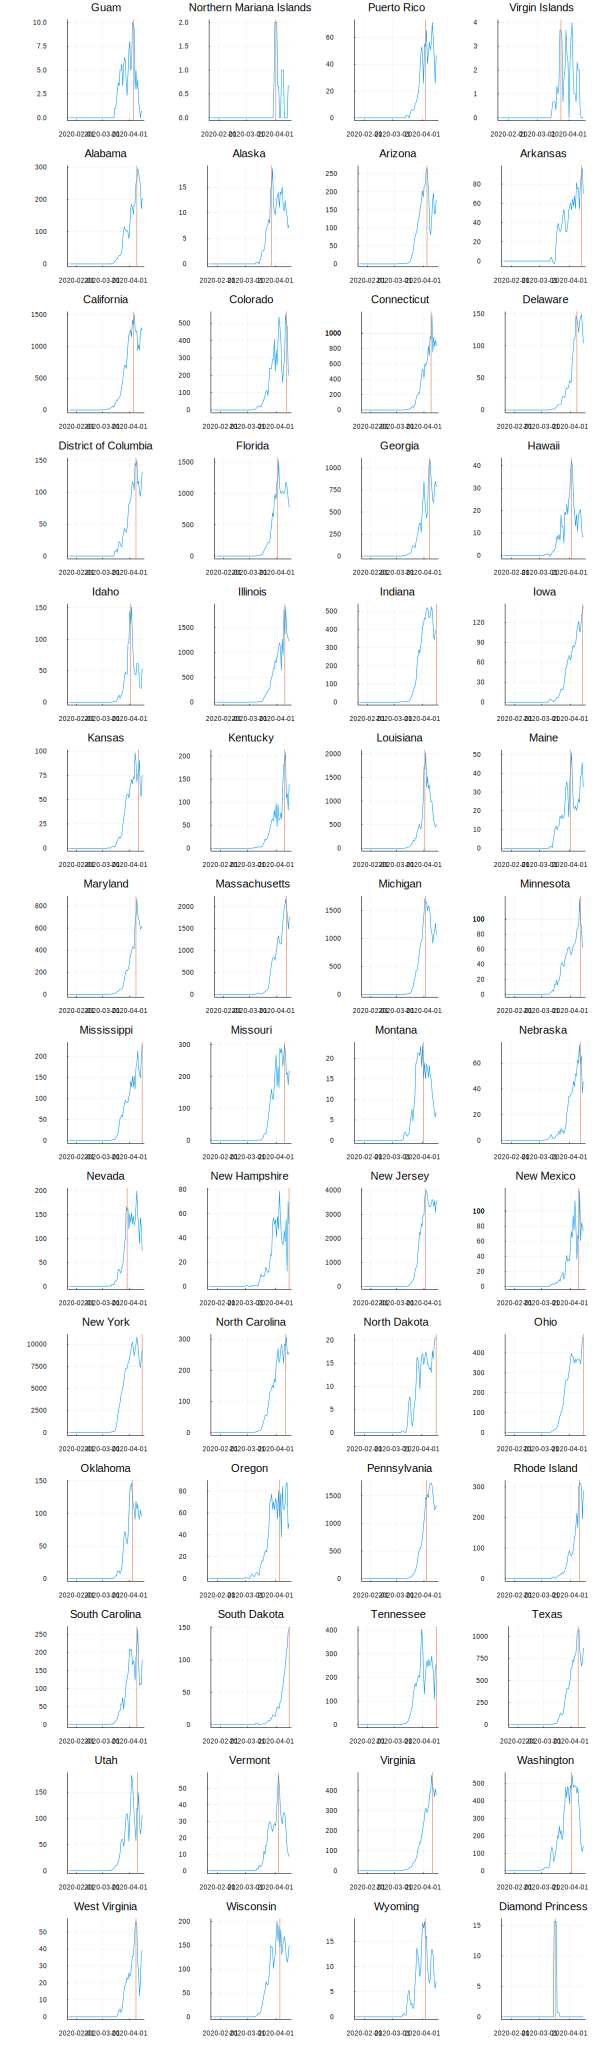

In [191]:
# daily newcasesis pretty jagged, so let's smooth a little
p = []
@time for i = 2:57
    pi = plot(datelist[3:end-1], smooth(newcases(stateconfirm[states[i]]),3), title=states[i], legend=false)
    pi = vline!([statereports.maxnewconfirm[i]])
    push!(p, pi)
end
@time savefig(plot(p..., size=(3000,2400), layout=(7,8), left_margin=50px), "allnewconfirm.png")
@time plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

## new death

  0.219520 seconds (866.21 k allocations: 35.663 MiB)
  0.391173 seconds (296.41 k allocations: 15.320 MiB, 9.45% gc time)


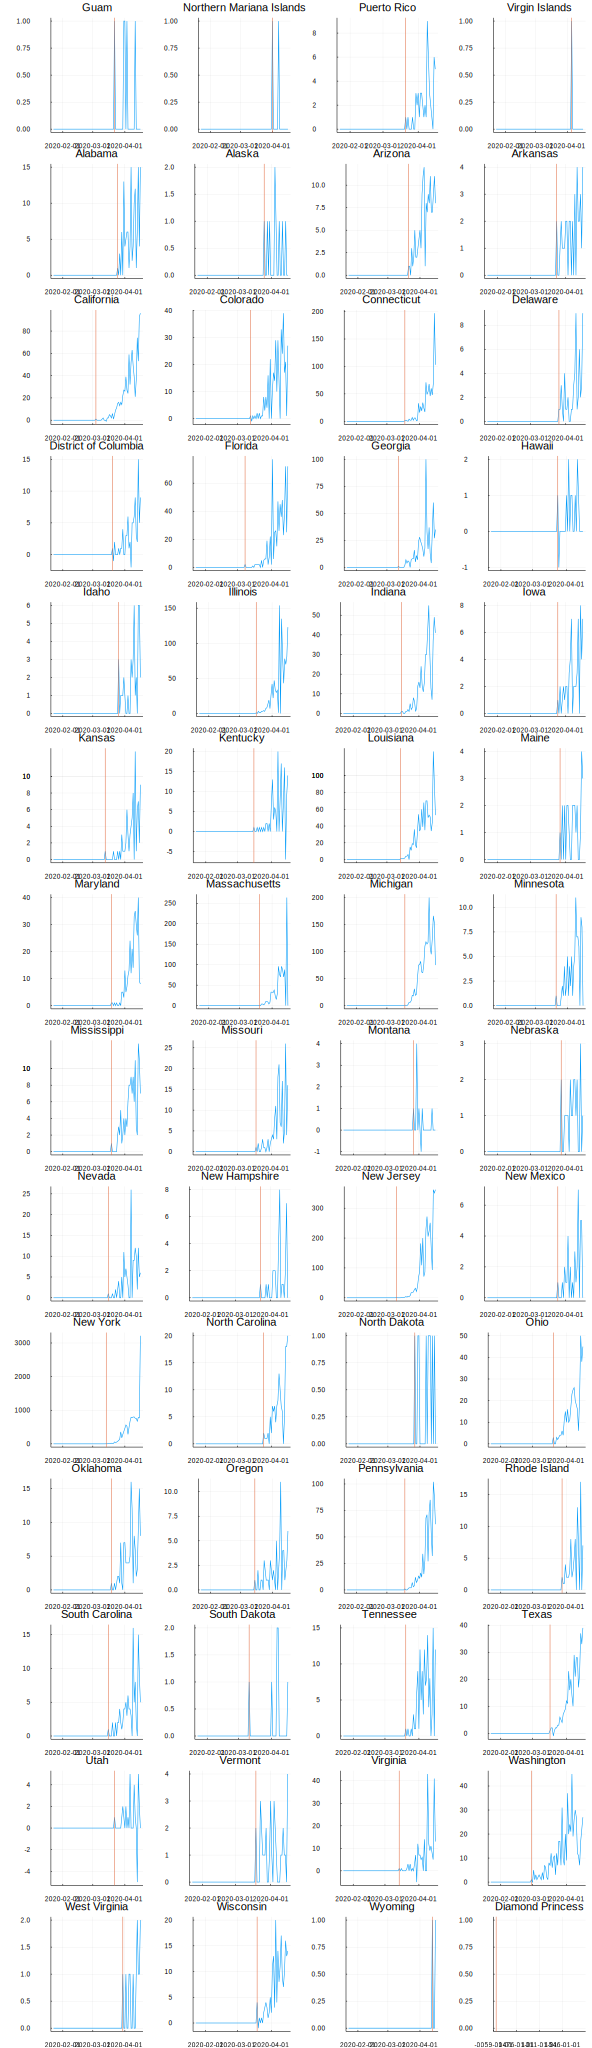

In [57]:
# plot newcases with death1
p = []
@time for i = 2:57
    pi = plot(datelist[2:end], newcases(statedeath[states[i]]), title=states[i], legend=false)
    pi = vline!([statereports.death1[i]])
    push!(p, pi)
end
@time plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

  0.091701 seconds (602.90 k allocations: 20.595 MiB)
  0.654287 seconds (376.36 k allocations: 19.152 MiB)
  0.007064 seconds (28.51 k allocations: 1.766 MiB)


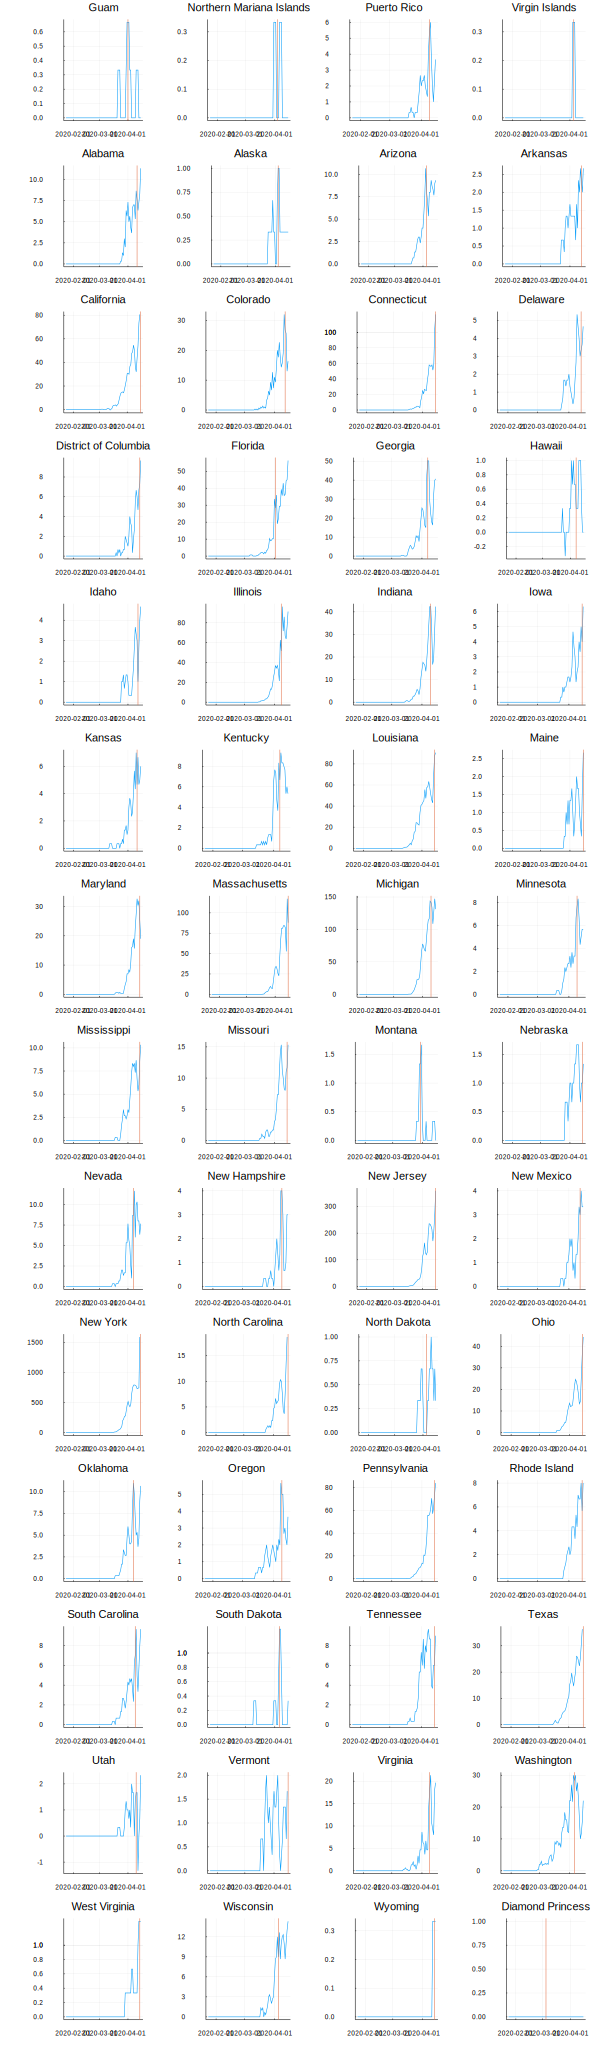

In [192]:
# smooth newcases death
p = []
@time for i = 2:57
    pi = plot(datelist[3:end-1], smooth(newcases(statedeath[states[i]]),3), title=states[i], legend=false)
    pi = vline!([statereports.maxnewdeath[i]])
    push!(p, pi)
end
@time savefig(plot(p..., size=(3000,2400), layout=(7,8), left_margin=50px), "allnewdeath.png")
@time plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

## confirm + death plot

In [220]:
states[57]

"Diamond Princess"

  0.168392 seconds (805.50 k allocations: 31.643 MiB)
  0.008307 seconds (29.76 k allocations: 2.776 MiB)


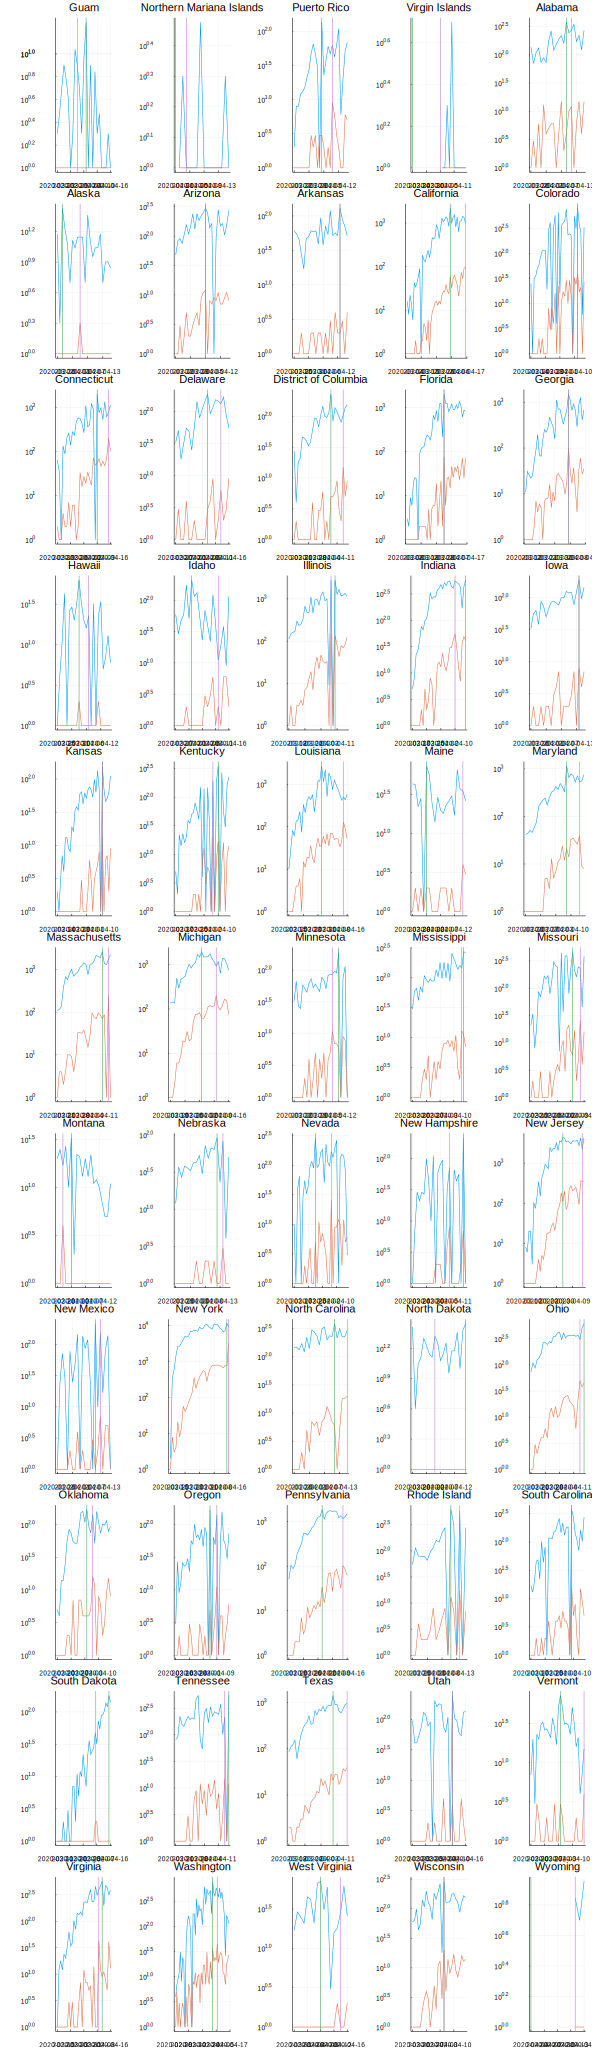

In [223]:
# log new cases plot starting with first death
p = []
@time for i = 2:56
    di = findfirst(x->x==statereports.death1[i], datelist)
    pi = plot(datelist[di+1:end], logprotect(newcases(stateconfirm[states[i]][di:end])), title=states[i], label="new confirmed cases", legend=false, yaxis=:log)
    plot!(pi, datelist[di+1:end], logprotect(newcases(statedeath[states[i]][di:end])), title=states[i], label="new deaths")
    vline!(pi, [statereports.maxnewconfirm[i]], label="max new confirmed cases")
    vline!(pi, [statereports.maxnewdeath[i]], label="max new deaths")
    push!(p, pi)
end
@time plot(p..., size=(1100,3800), layout=(11,5), left_margin=50px)

## single plot

In [59]:
chosen = ["California", "New York", "Florida", "Montana", "Washington", "Illinois", "Michigan", "Texas"]

8-element Array{String,1}:
 "California"
 "New York"
 "Florida"
 "Montana"
 "Washington"
 "Illinois"
 "Michigan"
 "Texas"

In [60]:
@time ci = [findfirst(x->x==s, states) for s in chosen]

  0.064497 seconds (104.73 k allocations: 5.267 MiB)


8-element Array{Int64,1}:
 10
 38
 15
 32
 53
 19
 28
 49

In [61]:
@time map(x->statereports.confirm5[x], [findfirst(x->x==s, states) for s in chosen])

  0.142221 seconds (280.70 k allocations: 14.445 MiB)


8-element Array{Date,1}:
 2020-02-03
 2020-03-04
 2020-03-07
 2020-03-14
 2020-02-29
 2020-03-05
 2020-03-13
 2020-03-07

In [74]:
@time mi = findmin(map(x->statereports.confirm5[x], ci))

  0.072493 seconds (92.43 k allocations: 4.749 MiB)


(2020-02-03, 1)

In [75]:
@time start = ci[mi[2]]

  0.000014 seconds


10

  0.024537 seconds (17.36 k allocations: 963.142 KiB)


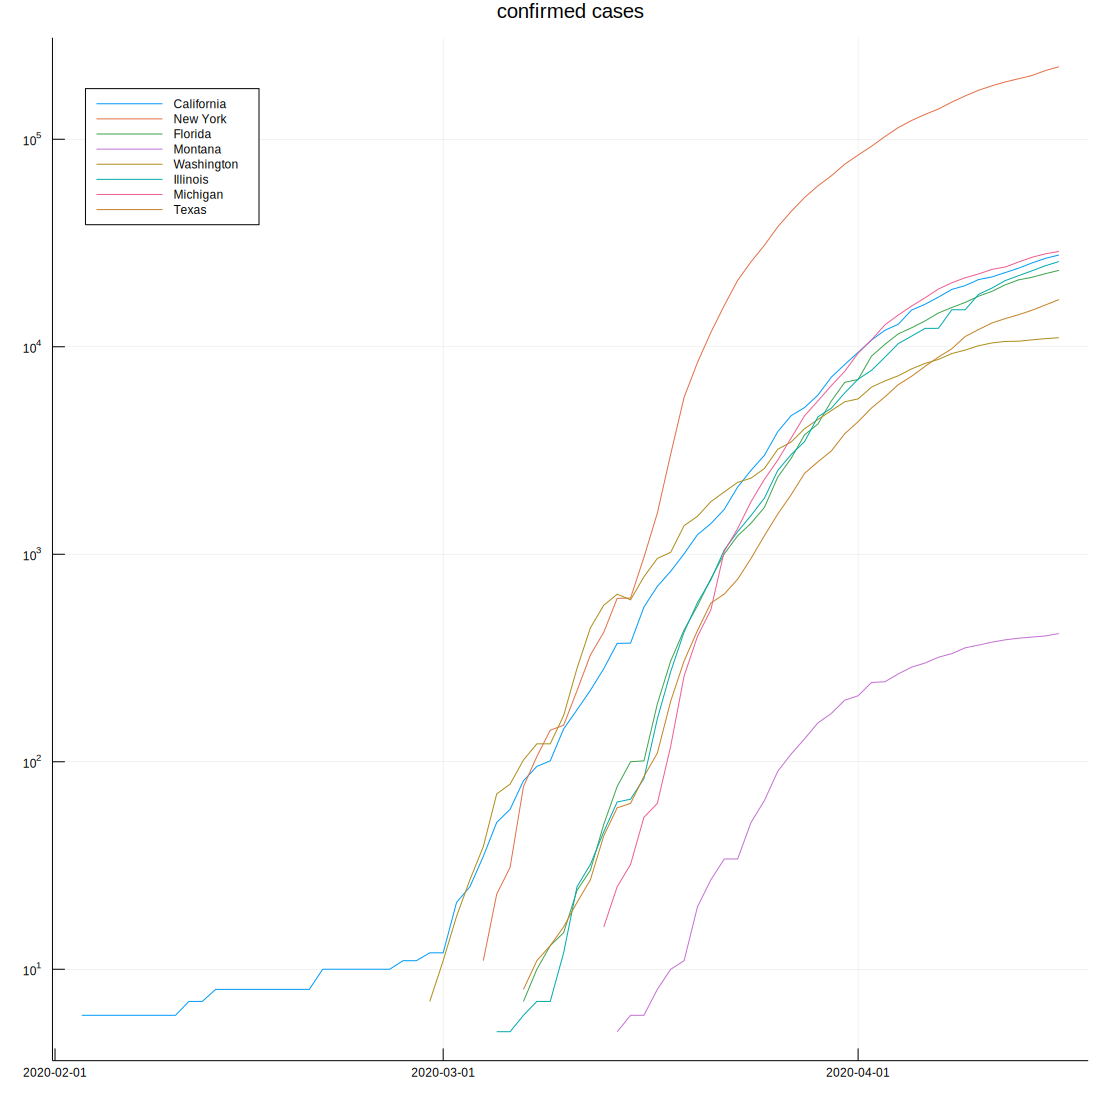

In [97]:
# log plot select confirmed cases
si = findfirst(x->x==statereports.confirm5[start], datelist)
p = plot(datelist[si:end], logprotect(stateconfirm[states[start]][si:end]), label=states[start], yaxis=:log,
    legend=:topleft, size=(1100,1100), title="confirmed cases")
@time for i in vcat(ci[1:mi[2]-1], ci[mi[2]+1:end])
    si = findfirst(x->x==statereports.confirm5[i], datelist)
    plot!(p, datelist[si:end], logprotect(stateconfirm[states[i]][si:end]), label=states[i])
end
savefig(p, "selectconfirm.png")
p

  0.002583 seconds (12.03 k allocations: 784.977 KiB)


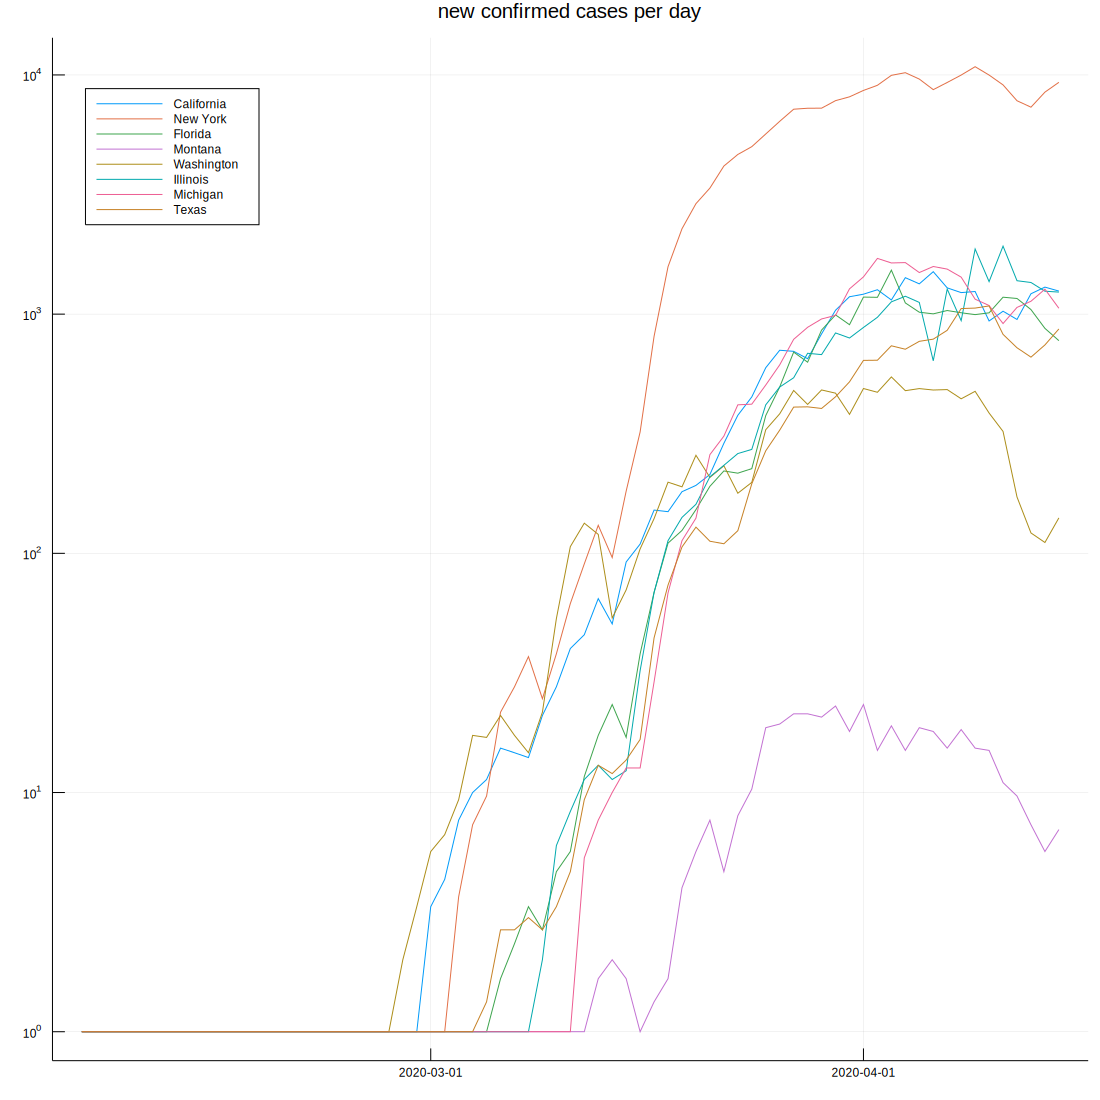

In [96]:
# plot select new cases
si = findfirst(x->x==statereports.confirm5[start], datelist)
p = plot(datelist[si+2:end-1], logprotect(smooth(newcases(stateconfirm[states[start]]), 3)[si:end]), label=states[start], yaxis=:log,
    legend=:topleft, size=(1100,1100), title="new confirmed cases per day")
@time for i in vcat(ci[1:mi[2]-1], ci[mi[2]+1:end])
    plot!(p, datelist[si+2:end-1], logprotect(smooth(newcases(stateconfirm[states[i]]), 3)[si:end]), label=states[i])
end
savefig(p, "selectnewconfirm.png")
p

  0.005003 seconds (12.03 k allocations: 784.977 KiB)


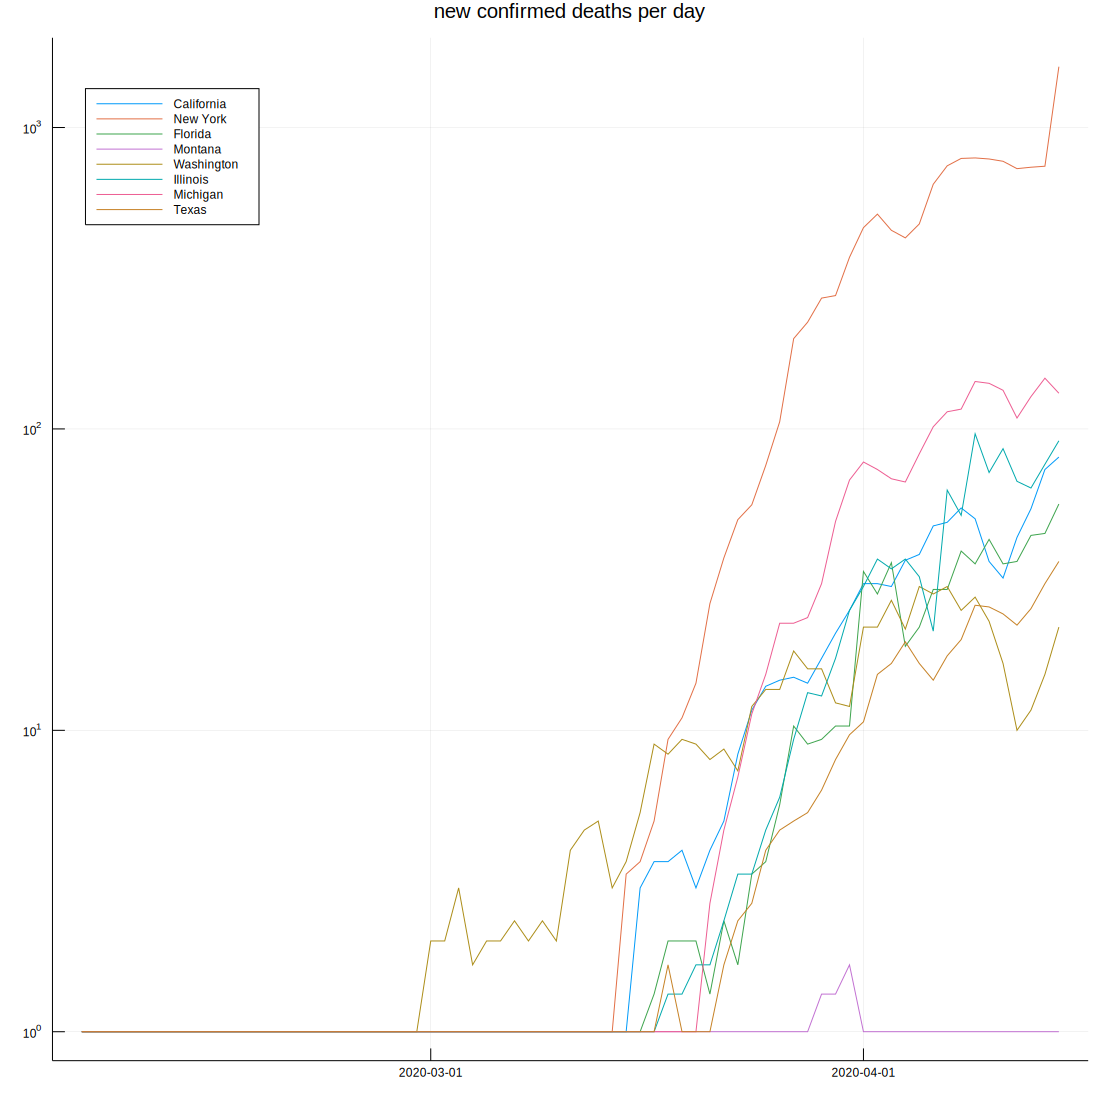

In [98]:
# plot select new deaths
si = findfirst(x->x==statereports.confirm5[start], datelist)
p = plot(datelist[si+2:end-1], logprotect(smooth(newcases(statedeath[states[start]]), 3)[si:end]), label=states[start], yaxis=:log,
    legend=:topleft, size=(1100,1100), title="new confirmed deaths per day")
@time for i in vcat(ci[1:mi[2]-1], ci[mi[2]+1:end])
    plot!(p, datelist[si+2:end-1], logprotect(smooth(newcases(statedeath[states[i]]), 3)[si:end]), label=states[i])
end
savefig(p, "selectnewdeath.png")
p